<a href="https://colab.research.google.com/github/robertramos89/Coding-Dojo---Data-Science--RR/blob/main/PortfolioProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project #1 

- Robert Ramos
- 2/3/22

In [33]:
# Mount Data
from google.colab import drive
drive.mount = "/content/drive"

In [34]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config

set_config(display='diagram')

In [35]:
# Load dataset
sales_prediction = "/content/sales_predictions.csv"

df = pd.read_csv(sales_prediction)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Dictionary


- Variable Name = Description
- Item_Identifier = Unique product ID
- Item_Weight = Weight of product
- Item_Fat_Content = Whether the product is low fat or regular
- Item_Visibility = The percentage of total display area of all products in a - store allocated to the particular product
- Item_Type = The category to which the product belongs
- Item_MRP = Maximum Retail Price (list price) of the product
- Outlet_Identifier = Unique store ID
- Outlet_Establishment_Year = The year in which store was established
- Outlet_Size = The size of the store in terms of ground area covered
- Outlet_Location_Type = The type of area in which the store is located
- Outlet_Type = Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales = Sales of the product in the particular store. This is the target variable to be predicted.

## 1) How many rows and columns?

In [36]:
# run df.inf() to get
df.info()

# 8523 rows, 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2) What are the datatypes of each variable?

In [37]:
# Run df.dtypes to list out datatypes of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3) Are there duplicates? If so, drop any duplicates.

In [38]:
# run duplicated() method to find duplicates within the dataset
duplicates = df.duplicated()
df[duplicates]

# no duplicates within the dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


## 4) Identify missing values.

In [39]:
# Run df.info to figure out which columns have missing data
df.isnull().sum()

# From this data we can see that Item_Weight & Outlet_Size are the only two columns with missing data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
Item_Weight_Missing = df["Item_Weight"].isna()
df.loc[Item_Weight_Missing,:]

# Below shows all of the rows (1463) from the Item_Weight columns that have null values. This matches the # of rows we saw in Item_Weight when we ran the isnull method

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [41]:
Outlet_Size_Missing = df["Outlet_Size"].isna()
df.loc[Outlet_Size_Missing,:]

# Below shows all of the rows (2410) from the Outlet_Size columns that have null values. This matches the # of rows we saw in Outlet_Size when we ran the isnull method

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


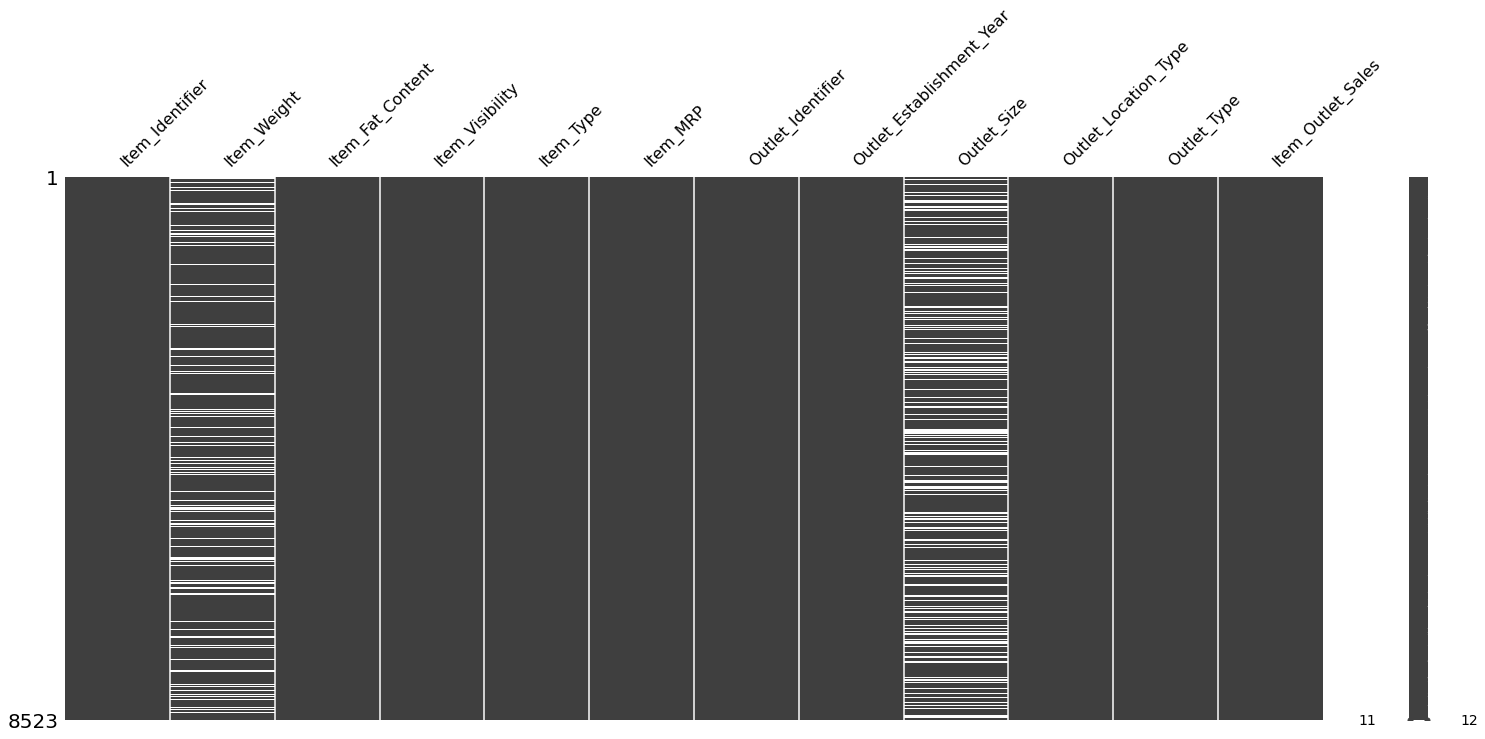

In [42]:
# import missingno library and run matric to see where missing values are occuring
import missingno
missingno.matrix(df)

## 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [43]:
# use the fillna method to replace the null values in Outlet_Size with "Not Provided"
# so that we do not lose this data and rather we are grouping them into a Not Provided value
df["Outlet_Size"].fillna("Not Provided", inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Provided,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Not Provided,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [44]:
# Running the dropna method to drop all remaining rows with null values which is now isolated to the Item_Weight column
# as it does not make sense to update this field to 0 in the event that weight is needed for sales prediction
df.dropna(inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Provided,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Not Provided,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 6) Confirm that there are no missing values after addressing them.

In [45]:
#  Ran the isnull method again to check for null values across all columns.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [46]:
# Run df.nunique() to view # of unique values by column
df.nunique()

Item_Identifier              1555
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              6519
Item_Type                      16
Item_MRP                     5225
Outlet_Identifier               8
Outlet_Establishment_Year       8
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     3
Item_Outlet_Sales            3066
dtype: int64

In [47]:
# Create variable to store column data types
data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [48]:
# filter variable to isolate object columns
string_cols = data_types[data_types == "object"].index
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [49]:
# Create a loop to view unique values for each string column
for col in string_cols:
    print(f"- {col}:")
    print(df[col].value_counts())
    print("\n\n")
    

- Item_Identifier:
FDF22    8
FDG33    8
DRE49    8
NCY18    8
DRN47    8
        ..
NCS41    1
FDP15    1
NCU29    1
FDH52    1
NCT53    1
Name: Item_Identifier, Length: 1555, dtype: int64



- Item_Fat_Content:
Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
Name: Ou

In [50]:
# From looking at the list above, we can see that the values in Item_Fat_Content seem to be inconsistent. 
# Firstrun replace method to replace LF and low fat to = Low Fat as well as updating reg to Regular

df["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat","Regular"], inplace= True)

In [51]:
# Rerun value counts to check unique values
df["Item_Fat_Content"].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [52]:
# Run df.describe() to obtain the statistical information on numerical columns only
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


## Histogram to view the distributions of various features in your dataset.

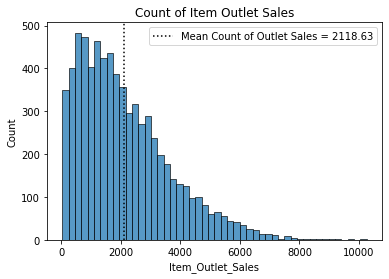

In [53]:
# Boxplot # 1
axes = sns.histplot(data=df, x="Item_Outlet_Sales")
axes.set_title("Count of Item Outlet Sales");
mean_outlet_sales =round(df["Item_Outlet_Sales"].mean(),2)
axes.axvline(mean_outlet_sales,color="k",ls=":",
           label=f"Mean Count of Outlet Sales = {mean_outlet_sales:.2f}");
axes.legend();

- The above histogram is showing me that the about half of the items sold have a total outlet sales count of < 2000

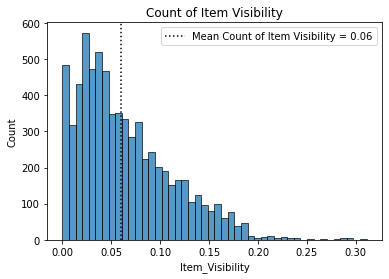

In [54]:
# Boxplot # 2
axes = sns.histplot(data=df, x="Item_Visibility")
axes.set_title("Count of Item Visibility");
mean_outlet_sales =round(df["Item_Visibility"].mean(),2)
axes.axvline(mean_outlet_sales,color="k",ls=":",
          label=f"Mean Count of Item Visibility = {mean_outlet_sales:.2f}");
axes.legend();
plt.show()

- The graph above shows us that most of that were sold in the outlet have a visibility < 6% which tells us that the item does not necessarily need high visibility to lead to high sales volume

## Boxplot to view statistical summaries of various features in your dataset.

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Provided,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

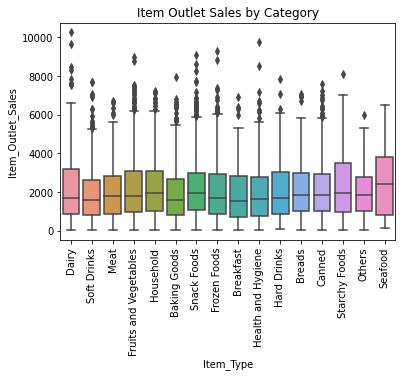

In [56]:
ax= sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=df)
ax.set_title("Item Outlet Sales by Category")
plt.xticks(rotation=90)

- The mean number of outlet sales across all item types are all hoveright right around the 2000 mark which matches what we can see in our histogram visual above.

## Heatmap of the correlation between features.

Text(0.5, 1.0, 'Correlation between Categories')

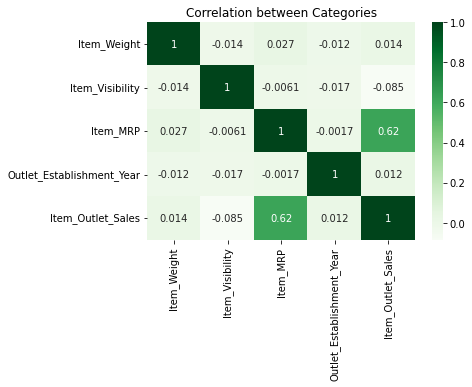

In [57]:
corr = df.corr()
ax = sns.heatmap(corr,cmap="Greens",annot=True)
ax.set_title("Correlation between Categories")

- The heatmap shows us that there is a high correlation between the maximum retail price and the # of sales that are generated.

## Does Higher Item MRP lead to more sales?

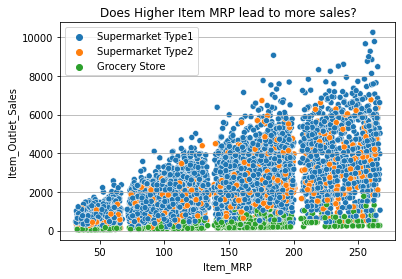

In [58]:
ax = sns.scatterplot(data=df,x="Item_MRP",y="Item_Outlet_Sales", hue="Outlet_Type")
ax.set_title("Does Higher Item MRP lead to more sales?")
ax.legend();
ax.grid(axis="y")

> Higher Item MRP does lead to more sales even amongst the different types of sales outlets

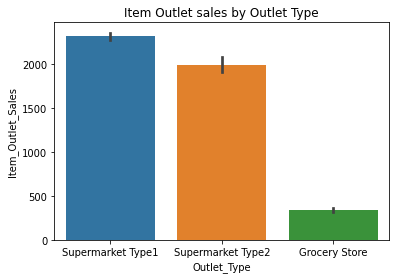

In [59]:
ax = sns.barplot(data=df,x="Outlet_Type",y="Item_Outlet_Sales").set(title="Item Outlet sales by Outlet Type")

> Item Outlet sales are higher in supermarkets over grocery stores

# Part 5

In [60]:
# reload data
sales_prediction_ml = '/content/sales_predictions.csv'
ml_df = pd.read_csv(sales_prediction_ml)
ml_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [61]:
# Assign X and y targets
X = ml_df.drop(columns = ['Item_Outlet_Sales'])
y = ml_df['Item_Outlet_Sales']

In [62]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [64]:
# identify datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 975.1+ KB


In [66]:
# col selectors and setup imputers
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [68]:
# Instantiate scaler and OHE
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [70]:
# Setup pipeline
cat_processor = make_pipeline(freq_imputer,ohe)
num_processor = make_pipeline(mean_imputer,scaler)

In [71]:
# setup tuple
cat_tuple = (cat_processor,cat_selector)
num_tuple = (num_processor,num_selector)

In [72]:
# Setup col transformer
# instantiate col transformer
col_transformer = make_column_transformer(cat_tuple,num_tuple,remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ad4ef9750>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ad4ef9550>)])

In [73]:
# fit processor to X_train
preprocessor = col_transformer.fit(X_train)

In [74]:
# transform training and testing set
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
                                    

In [75]:
X_train_processed

array([[ 0.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.92052713,
         1.52302674,  0.49368575],
       [ 0.        ,  0.        ,  0.        , ..., -0.2277552 ,
        -0.38377708,  1.0895166 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.95867683,
        -0.73836105, -0.10214509]])